In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/los-angeles-crime-data-2020-2023/Crime_Data_from_2020_to_Present.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import datetime as dt
import json
from ast import literal_eval
from random import randint


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve


import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the CSV file into dataframe df
crime_df = pd.read_csv('/kaggle/input/los-angeles-crime-data-2020-2023/Crime_Data_from_2020_to_Present.csv')
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
crime_df.shape

(757141, 28)

In [5]:
crime_df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [6]:
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'])
crime_df['year'] = crime_df['DATE OCC'].dt.year
crime_df['month'] = crime_df['DATE OCC'].dt.month

In [7]:
occurred = pd.to_datetime(crime_df['DATE OCC'], infer_datetime_format=True)
reported = pd.to_datetime(crime_df['Date Rptd'], infer_datetime_format=True)

crime_df['year'] = occurred.map(lambda x: x.year)
crime_df['month'] = occurred.map(lambda x: x.month)

crime_df = crime_df.drop(columns=['DATE OCC', 'Date Rptd'])

In [8]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757141 entries, 0 to 757140
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           757141 non-null  int64  
 1   TIME OCC        757141 non-null  int64  
 2   AREA            757141 non-null  int64  
 3   AREA NAME       757141 non-null  object 
 4   Rpt Dist No     757141 non-null  int64  
 5   Part 1-2        757141 non-null  int64  
 6   Crm Cd          757141 non-null  int64  
 7   Crm Cd Desc     757141 non-null  object 
 8   Mocodes         653226 non-null  object 
 9   Vict Age        757141 non-null  int64  
 10  Vict Sex        658230 non-null  object 
 11  Vict Descent    658224 non-null  object 
 12  Premis Cd       757132 non-null  float64
 13  Premis Desc     756699 non-null  object 
 14  Weapon Used Cd  263079 non-null  float64
 15  Weapon Desc     263079 non-null  object 
 16  Status          757141 non-null  object 
 17  Status Des

In [9]:
crime_df.columns

Index(['DR_NO', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2',
       'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON',
       'year', 'month'],
      dtype='object')

In [10]:
# crime_df['hour'] = crime_df['TIME OCC'].str.split(':').str.astype(int)
crime_df['hour'] = crime_df['TIME OCC'] // 100

In [11]:
violent = ['BATTERY - SIMPLE ASSAULT', 'INTIMATE PARTNER - SIMPLE ASSAULT', 'CRIMINAL HOMICIDE', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',\
          'DISCHARGE FIREARMS/SHOTS FIRED', 'BATTERY POLICE (SIMPLE)', 'RAPE', 'FORCIBLE BATTERY WITH SEXUAL CONTACT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',\
          'ROBBERY', 'SHOTS FIRED AT INHABITED DWELLING', 'OTHER ASSAULT', 'KIDNAPPING', 'BRANDISH WEAPON', 'ATTEMPTED ROBBERY']

theft = ['BURGLARY', 'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',\
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114',\
        'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',\
        'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'THEFT, PERSON', 'BURGLARY, ATTEMPTED',\
        'BIKE - STOLEN', 'BUNCO, PETTY THEFT', 'BUNCO, GRAND THEFT', 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',\
        'THEFT PLAIN - ATTEMPT']

vehicular = ['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', \
             'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)', 'VEHICLE - ATTEMPT STOLEN', 'BURGLARY FROM VEHICLE, ATTEMPTED']

crime_df['crime_type'] = crime_df['Crm Cd Desc'].apply(lambda x: 'violent' if x in violent else 'nonviolent')
crime_df['theft'] = crime_df['Crm Cd Desc'].apply(lambda x: 1 if x in theft else 0)
crime_df['vehicular'] = crime_df['Crm Cd Desc'].apply(lambda x: 1 if x in vehicular else 0)


**Decision Tree**

In [12]:
#dividing into categorical and numerical features
categorical_cols = ['Premis Cd', 'Weapon Used Cd', 'Crm Cd', 'Rpt Dist No']
numerical_features = ['hour']

#encoding categorical features
label_encoder = LabelEncoder()
for feature in categorical_cols:
    crime_df[feature] = label_encoder.fit_transform(crime_df[feature])
X = crime_df[categorical_cols + numerical_features]

#target feature
y = crime_df['Part 1-2']

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PCA to reduce dimentionality
pca = PCA(n_components=2)
#PCA on X_train
X_train_pca = pca.fit_transform(X_train)
#PCA on X_test
X_test_pca = pca.transform(X_test)
#model fitting
clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy: 0.91
              precision    recall  f1-score   support

           1       0.92      0.92      0.92    132559
           2       0.89      0.89      0.89     94584

    accuracy                           0.91    227143
   macro avg       0.90      0.90      0.90    227143
weighted avg       0.91      0.91      0.91    227143



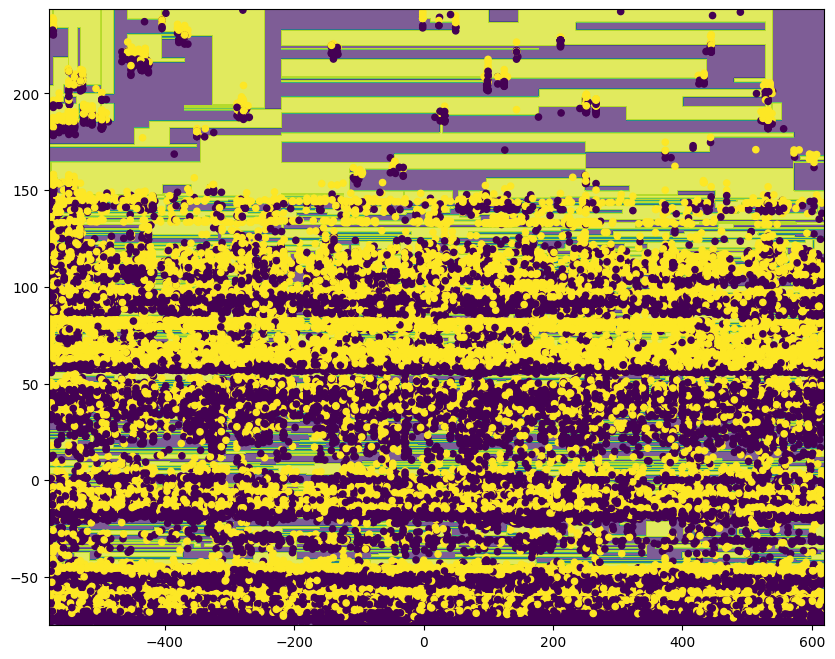

In [13]:
#Plot Decision Boundary
X_plot = X_test_pca

x_min, x_max = X_plot[:,0].min() - 0.5, X_plot[:,0].max() + 0.5
y_min, y_max = X_plot[:,1].min() - 0.5, X_plot[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

# Make predictions for grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.7)
y_plot = y_test
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, s=20)
plt.show()

In [14]:
# # Make sure that the column names of X are strings
# X.columns = X.columns.astype(str)

# # Convert clf.classes_ to strings if necessary
# class_names = [str(class_name) for class_name in clf.classes_]

# plt.figure(figsize=(12, 8))
# tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
# plt.show()

**Naive Bayes Classifier**

In [15]:
categorical_features = ['AREA', 'Premis Cd', 'Weapon Used Cd', 'Part 1-2', 'crime_type']
numeric_features = ['hour', 'Vict Age']

# Encode categorical features as numbers
label_encoder = LabelEncoder()
for feature in categorical_features:
    crime_df[feature] = label_encoder.fit_transform(crime_df[feature])
# Encode Vict Sex as numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(crime_df['theft'])
# y = crime_df['hour']
X = crime_df[categorical_features + numeric_features]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Gaussian Naive Bayes for numerical features
gnb = GaussianNB()
gnb.fit(X_train[numeric_features], y_train)

# Multinomial Naive Bayes for categorical features
# mnb = MultinomialNB()
mnb = CategoricalNB()
mnb.fit(X_train[categorical_features], y_train)

# Combine predictions
y_pred = (gnb.predict_proba(X_test[numeric_features]) +
          mnb.predict_proba(X_test[categorical_features]))/2

y_pred = np.argmax(y_pred, axis=1)

# Evaluate predictions
print(accuracy_score(y_test, y_pred))

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

0.7865600380376282
              precision    recall  f1-score   support

           0       0.79      0.98      0.87    112414
           1       0.79      0.23      0.36     39015

    accuracy                           0.79    151429
   macro avg       0.79      0.61      0.62    151429
weighted avg       0.79      0.79      0.74    151429



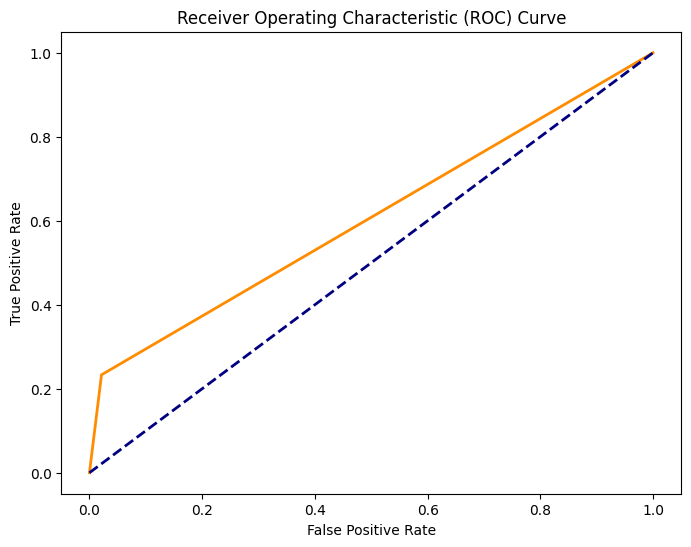

In [16]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

**Random Forest Classifier**

In [17]:
train_cols = ['hour', 'month', 'LAT','LON', 'Rpt Dist No', 'Part 1-2', 'Vict Age'] 

In [18]:
model_df = crime_df.copy()
model_df = model_df[['crime_type','hour', 'month', 'LAT','LON', 'Rpt Dist No', 'Part 1-2', "Vict Age", 'theft', 'vehicular']]
model_df = model_df.dropna()

In [19]:
X = model_df[train_cols]
Y = model_df['vehicular']

X_train, X_test, y_train, y_test = train_test_split(X, Y)

clf = RandomForestClassifier(n_estimators = 50, criterion = 'gini',\
max_depth = 25, max_features=4)

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('train accuracy is', accuracy_score(y_train, y_train_pred) \
      ,'and test accuracy is', accuracy_score(y_test, y_test_pred))

train accuracy is 0.9673966065280749 and test accuracy is 0.8768847141362806


In [20]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92    149078
           1       0.77      0.59      0.67     40208

    accuracy                           0.88    189286
   macro avg       0.84      0.77      0.80    189286
weighted avg       0.87      0.88      0.87    189286



In [21]:
feat_importance = pd.DataFrame(list(zip(train_cols, clf.feature_importances_)))

feat_importance.sort_values(1, ascending=True).head()

,0,1
1,month,0.077064
0,hour,0.078965
4,Rpt Dist No,0.082760
2,LAT,0.145323
3,LON,0.146010


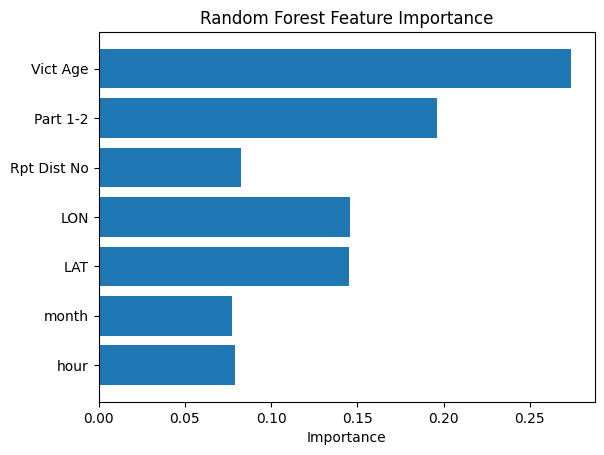

In [22]:
# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of features
feature_list = list(train_cols)

# Create plot
plt.barh(feature_list, importances)

# Add title
plt.title('Random Forest Feature Importance')

# Add y-axis label
plt.xlabel('Importance')

# Show plot
plt.show()

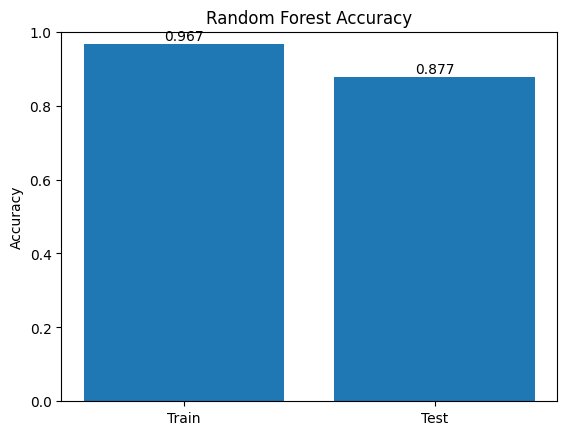

In [23]:
# Train and test accuracies from previous code
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Plot accuracies
plt.bar(['Train', 'Test'], [train_acc, test_acc])
plt.title('Random Forest Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0,1)

# Annotate values on bars
for i, v in enumerate([train_acc, test_acc]):
    plt.text(i, v + .01, str(round(v, 3)), ha='center')

plt.show()

**K Nearest Neighbour**

In [24]:
target_column = 'crime_type'
feature_columns = ['AREA', 'hour', 'Vict Age', 'Premis Cd', 'Weapon Used Cd']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(crime_df[target_column])

# Select the feature columns and create your feature matrix
X = crime_df[feature_columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Range of K values to try
k_range = range(1, 20)

error_rate = []
accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Prediction and error calculation
    y_pred = knn.predict
    (X_test)
    error_rate.append(1 - accuracy_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))


# Plot the error rate and accuracy
plt.figure(figsize=(12,6))
plt.plot(k_range, error_rate, label='Error Rate')
plt.plot(k_range, accuracy, label='Accuracy')
plt.legend()
plt.xlabel('K')
plt.ylabel('Error Rate/Accuracy')
plt.title('Error Rate and Accuracy for Different K')
plt.show()

InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got <bound method KNeighborsClassifier.predict of KNeighborsClassifier(n_neighbors=1)> instead.

In [ ]:
# Plot error rate vs k
plt.plot(k_range, error_rate)

# Find k that minimizes error
min_error = min(error_rate)
optimal_k = error_rate.index(min_error) + 1

# Highlight minimum error point
plt.scatter(optimal_k, min_error, s=75, c='red')

# Annotate minimum error
plt.annotate(f'Minimum Error: {optimal_k}', xy=(optimal_k, min_error))

plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K')


# Plot accuracy vs k
plt.figure()
plt.plot(k_range, accuracy)

# Find k that maximizes accuracy
max_accuracy = max(accuracy)
optimal_k = accuracy.index(max_accuracy) + 1

# Highlight maximum accuracy point
plt.scatter(optimal_k, max_accuracy, s=75, c='red')

# Annotate maximum accuracy
plt.annotate(f'Maximum Accuracy: {optimal_k}', xy=(optimal_k, max_accuracy))

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')

plt.show()

In [ ]:
# Initialize the KNN classifier
k = 11
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model on the training data
knn.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recalls, precisions, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

**Logistic Regression**

In [ ]:
feature_columns = ['AREA', 'Vict Sex', 'Vict Age', 'Weapon Used Cd']
target_column = 'crime_type'

X = crime_df[feature_columns]
y = crime_df[target_column]

# Encode categorical features if necessary
X = pd.get_dummies(X, columns=['AREA', 'Vict Sex', 'Weapon Used Cd'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Predict crime types on the test data
y_pred = logistic_model.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
# Predict probabilities on test set
y_pred_proba = logistic_model.predict_proba(X_test)[:,1]

# Generate plot
sns.regplot(x=y_pred_proba, y=y_test, logistic=True, y_jitter=.1)

# Label axes
plt.xlabel('Predicted Probability')
plt.ylabel('True Class')